In [1]:
import numpy as np

In [40]:
# y = ax + b  
class Perceptron:
    def __init__(self, lr=0.1):
        self.w = 1 # 랜덤
        self.b = 0 # 랜덤
        self.lr = lr
    
    def fit(self, x, y): # 학습능력, 입력과 정답
        p = self.predict(x)
        # e = y - p # 패널티, 에러
        e = (y - p) / len(x)

        self.w += self.lr * np.dot(e, x)
        self.b += self.lr * np.sum(e)
        
        # 교정 , 학습률(0.1 / 0.01)
        # self.w += self.lr * e * x 
        # self.b += self.lr * e

    def predict(self, x):
        return x * self.w + self.b

In [41]:
perc = Perceptron()

In [27]:
X = np.random.randn(30)
Y = 3*X + 1

In [24]:
for x, y in zip(X, Y):
    perc.fit(x,y)
    print('w:', perc.w, "b:", perc.b)

w: 1.050764032910946 b: -0.062484694879744396
w: 1.1770251029783076 b: -0.1749909108958137
w: 1.1935364156109238 b: -0.03585803407934038
w: 1.4154920010232857 b: 0.22276323344236418
w: 1.4171716829185133 b: 0.21947783677084323
w: 1.4097395831438286 b: 0.2398850480703695
w: 1.401870982339444 b: 0.2639938747545799
w: 1.4826877752281455 b: 0.42025056939339045
w: 1.6873579381388317 b: 0.6278301110969646
w: 1.69934664634676 b: 0.6026212079513659
w: 2.343199742360335 b: 0.9125552154608672
w: 2.411096793550082 b: 0.8500051374289475
w: 2.4663217591359343 b: 0.7999856483133737
w: 2.5108087502360936 b: 0.7602451529313088
w: 2.5812229346920663 b: 0.8321353681572774
w: 2.5854309703783858 b: 0.8562343063588603
w: 2.6128211554383958 b: 0.8289670591074416
w: 2.610937683256173 b: 0.8370641636917924
w: 2.618881398768142 b: 0.8645869781369299
w: 2.702998112680969 b: 0.9283811870890325
w: 2.7305903561970357 b: 0.9031122061424733
w: 2.7658074772809957 b: 0.87677565107423
w: 2.766682978850078 b: 0.89058305

In [47]:
for _ in range(30):
    perc.fit(X,Y)
    print('w:', perc.w, "b:", perc.b)

w: 2.997920958032923 b: 0.9984741841395817
w: 2.998025381928396 b: 0.9985508204950204
w: 2.998124560906931 b: 0.9986236077107012
w: 2.9982187584090725 b: 0.9986927391092647
w: 2.998308224642926 b: 0.9987583983042952
w: 2.9983931972488636 b: 0.9988207596878594
w: 2.9984739019308377 b: 0.9988799888935717
w: 2.9985505530559715 b: 0.9989362432364144
w: 2.998623354224029 b: 0.9989896721304788
w: 2.998692498808274 b: 0.9990404174857338
w: 2.9987581704691575 b: 0.9990886140848745
w: 2.9988205436421995 b: 0.9991343899412508
w: 2.9988797840013595 b: 0.9991778666388251
w: 2.99893604889913 b: 0.9992191596550601
w: 2.998989487784524 b: 0.9992583786675943
w: 2.9990402426000595 b: 0.9992956278455185
w: 2.9990884481588105 b: 0.9993310061260265
w: 2.9991342325025085 b: 0.9993646074771735
w: 2.9991777172416625 b: 0.9993965211474396
w: 2.99921901787859 b: 0.9994268319027618
w: 2.9992582441142224 b: 0.9994556202516626
w: 2.999295500139502 b: 0.9994829626590722
w: 2.9993308849121365 b: 0.9995089317494144


# 오후

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
iris

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# 행렬은 대문자, 벡터는 소문자 관습
X = iris.iloc[:, :4].values
X = X[:, [0,2]]
y = iris.iloc[:, 4].values

# 세토사면 -1, 아니면 1
y = np.where(y == 'Iris-setosa', -1, 1)

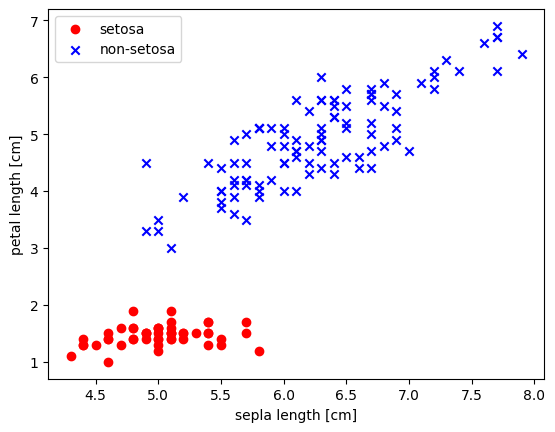

In [14]:
plt.figure()
plt.scatter(X[y==-1, 0], X[y==-1, 1], color='red', marker='o', label='setosa')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='x', label='non-setosa')
plt.xlabel('sepla length [cm]')
plt.ylabel('petal length [cm]')
plt.legend()
plt.show()

In [24]:
import numpy as np

class Perceptron(object): 
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, shuffle=False, random_state=1):
        self.eta = eta
        self.n_iter = n_iter # 학습 몇 번
        self.shuffle = shuffle # 들어온 데이터를 섞어줌
        self.random_state = random_state # w, b를 랜덤하게 사용할 변수

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        # w를 생성함
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]) # X행렬에서 1, +1이 is b
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            if self.shuffle:
                X, y = self._shuffle(X, y)
                
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update # w[0]이 b
                errors += int(update != 0.0)
            self.errors_.append(errors)
            self.plot_decision_regions(X, y, self)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]

    def net_input(self, X):
        """Calculate net input"""
        # 퍼셉트론 계산하는 부분 wx + b 부분
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        # 기준선이 0 / 가까우면 긴가민가, 멀면 확률 올라감
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    
    def plot_decision_regions(self, X, y, classifier, resolution=0.02):

      # setup marker generator and color map
      markers = ('s', 'x', 'o', '^', 'v')
      colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
      cmap = ListedColormap(colors[:len(np.unique(y))])

      # plot the decision surface
      x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
      x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
      xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
      #print(xx1)
      #print(xx2)
      #print(np.array([xx1.ravel(), xx2.ravel()]).T)
      
      Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
      Z = Z.reshape(xx1.shape)
      plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
      plt.xlim(xx1.min(), xx1.max())
      plt.ylim(xx2.min(), xx2.max())

      # plot class samples
      for idx, cl in enumerate(np.unique(y)):
          plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                      alpha=0.8, c=cmap(idx),
                      edgecolor='black',
                      marker=markers[idx], 
                      label=cl)
      plt.xlabel('sepla length [cm]')
      plt.ylabel('petal length [cm]')
      plt.legend()
      plt.show()

In [37]:
perc = Perceptron(eta=0.00001, n_iter=10, shuffle=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_3948\572800164.py:104: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
C:\Users\PC\AppData\Local\Temp\ipykernel_3948\572800164.py:104: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


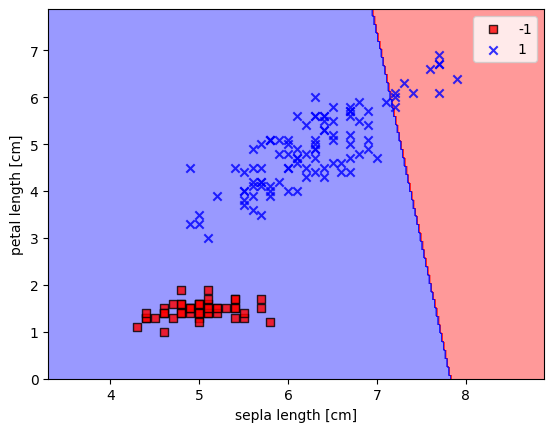

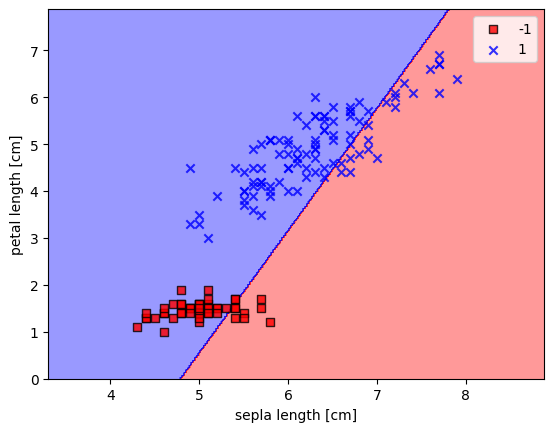

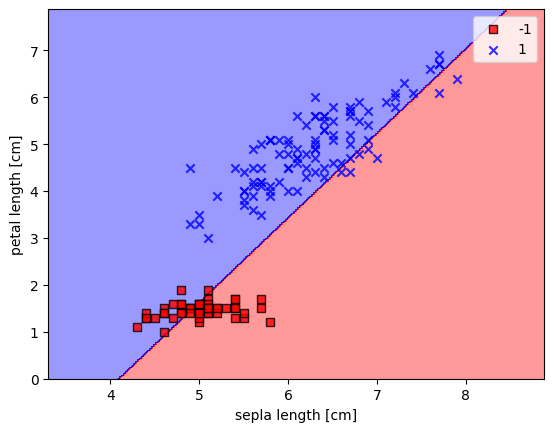

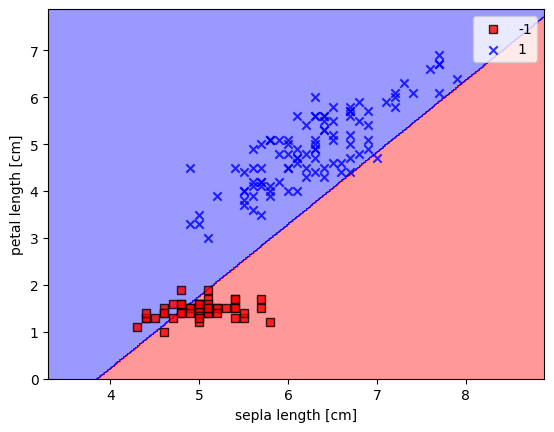

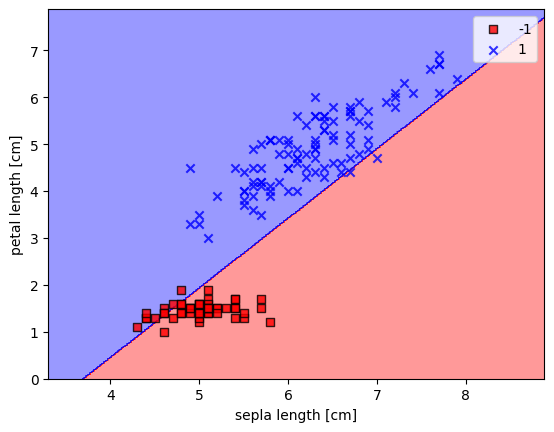

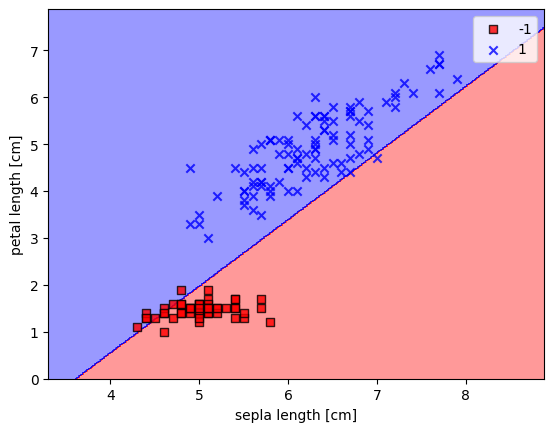

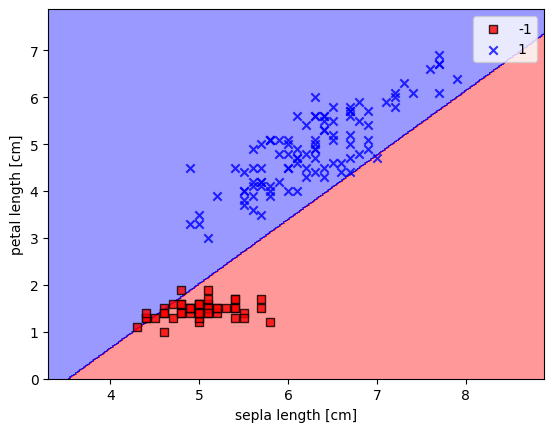

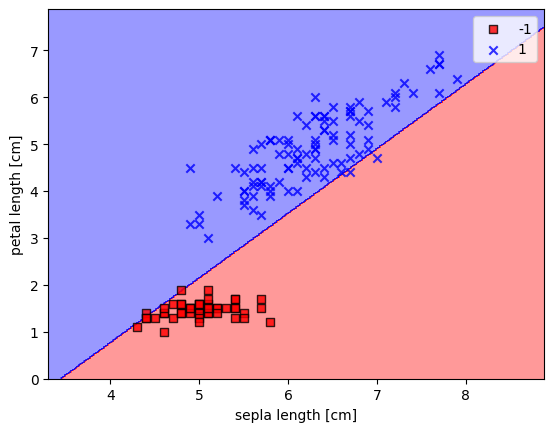

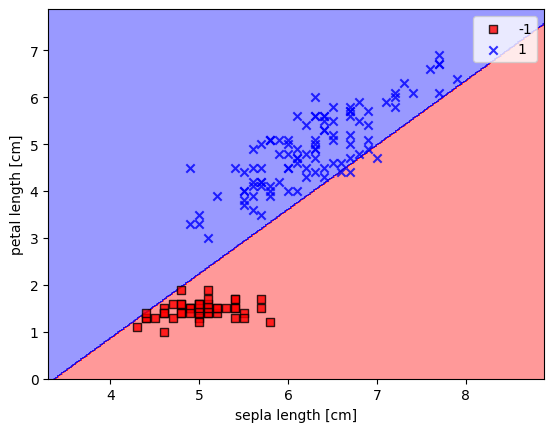

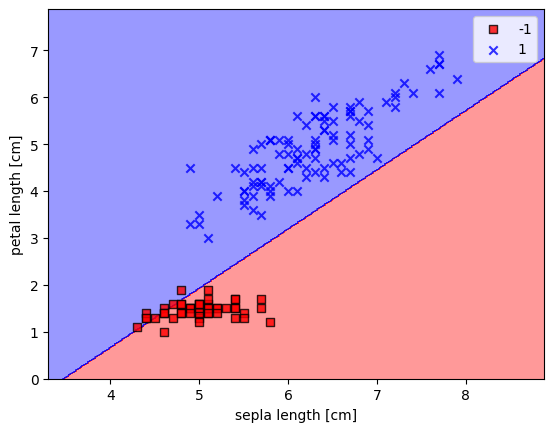

In [38]:
perc.fit(X, y)

In [33]:
perc.errors_

[102, 75, 45, 22, 16, 15, 5, 8, 7, 5]

In [21]:
perc.w_
# b, w1, w2

array([-0.38375655, -0.88611756,  2.05471828])

In [22]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    #print(xx1)
    #print(xx2)
    #print(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

C:\Users\PC\AppData\Local\Temp\ipykernel_3948\2919206103.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
C:\Users\PC\AppData\Local\Temp\ipykernel_3948\2919206103.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


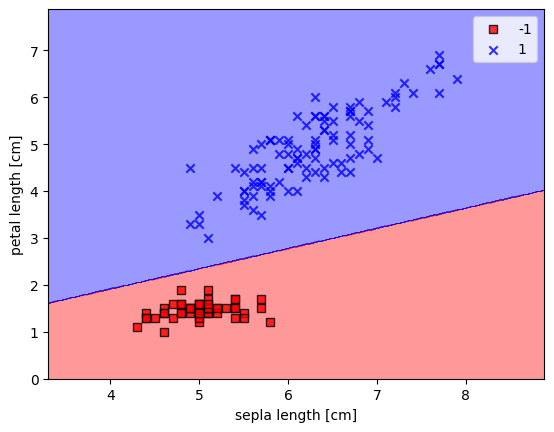

In [23]:
plot_decision_regions(X, y, perc)
plt.xlabel('sepla length [cm]')
plt.ylabel('petal length [cm]')
plt.legend()
plt.show()